Plot twist! The expert who priced these gems has now vanished. Francesco needs you to be the new diamond evaluator. He's looking for a model that predicts a gem's worth based on its characteristics. And, because Francesco's clientele is as demanding as he is, he wants the why behind every price tag.

Create a Jupyter notebook where you develop and evaluate your model.

In [1]:
import numpy as np
# First load the dataset diamonds.csv
import pandas as pd

df = pd.read_csv('datasets/diamonds/diamonds.csv')

print(df.shape)

(5000, 10)


In [2]:
features = df.columns.tolist()

for f in df.columns:
    print(df[f].dtype)
    
# by looking at the values (only 10 features) we can see numerical and categorical features
numeric_features = ["carat", "depth", "table", "x", "y", "z"]
cat_features = ["cut", "color", "clarity"]

float64
object
object
object
float64
float64
int64
float64
float64
float64


In [3]:
# convert data types to "unsigned" to speed up the analysis

for column in numeric_features:
    if df[column].min() >= 0:
        df[column] = pd.to_numeric(df[column], downcast='unsigned')

# eda, see if data makes sense

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,0.794486,61.711660,57.447060,3925.53940,5.725188,5.727744,3.533076
std,0.468424,1.446206,2.258999,3975.45212,1.119156,1.112106,0.690334
min,0.230000,44.000000,51.600000,-1.00000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,936.00000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2392.50000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5369.25000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.00000,10.000000,9.850000,6.430000


In [5]:
"""
From the data description we have to guarantee some requirements:
- all numerical data should be > 0 since we are dealing with a diamond
"""

to_drop = df.index[(df["price"] <= 0) | (df["carat"] <= 0) | (df["depth"] <= 0) | (df["table"] <= 0) | (df["x"] <= 0) | (df["y"] <= 0) | (df["z"] <= 0)].tolist()

# remove instances that are not consistent
df = df.drop(to_drop, axis=0)

df.describe()

,carat,depth,table,price,x,y,z
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,0.794117,61.710844,57.446242,3930.581880,5.726232,5.728821,3.533678
std,0.467981,1.445563,2.259752,3970.923311,1.116257,1.109167,0.688437
min,0.230000,44.000000,51.600000,351.000000,3.860000,3.840000,1.410000
25%,0.400000,61.000000,56.000000,942.000000,4.700000,4.710000,2.900000
50%,0.700000,61.800000,57.000000,2398.000000,5.690000,5.700000,3.530000
75%,1.040000,62.500000,59.000000,5376.000000,6.540000,6.540000,4.030000
max,4.130000,70.200000,95.000000,18787.000000,10.000000,9.850000,6.430000


# outlier detection

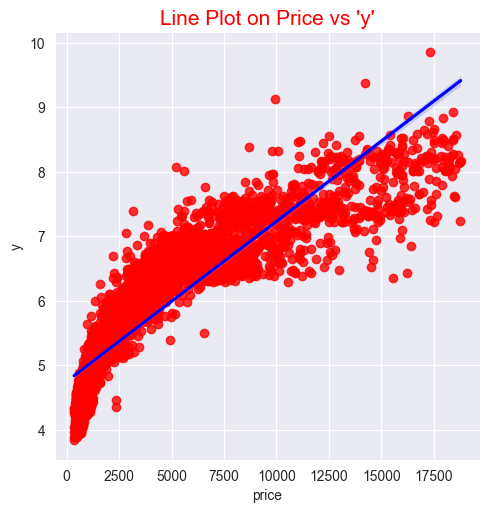

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

lm = sns.lmplot(x="price", y="y", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Line Plot on Price vs 'y'", color="red", fontsize = 15)
plt.show()

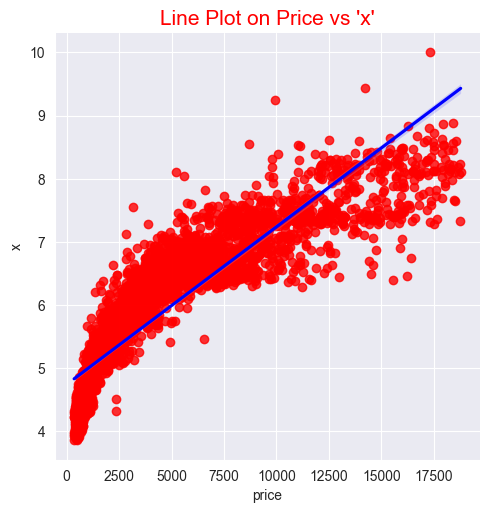

In [7]:
lm = sns.lmplot(x="price", y="x", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Line Plot on Price vs 'x'", color="red", fontsize = 15)
plt.show()

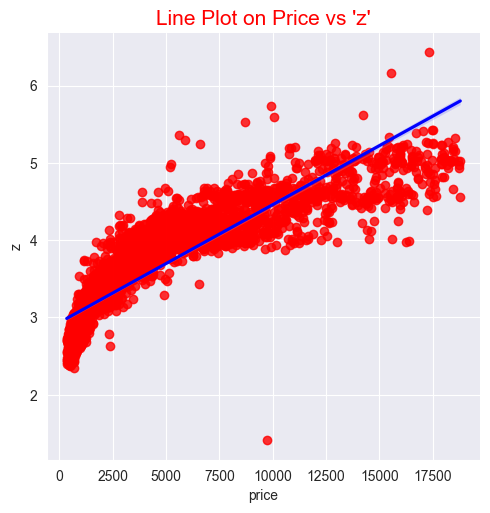

In [8]:
lm = sns.lmplot(x="price", y="z", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Line Plot on Price vs 'z'", color="red", fontsize = 15)
plt.show()

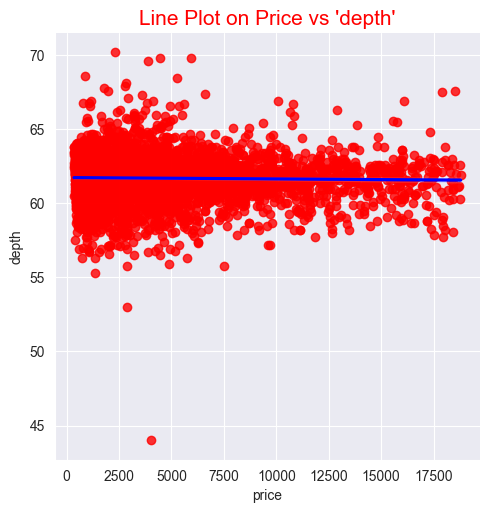

In [9]:
lm = sns.lmplot(x="price", y="depth", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Line Plot on Price vs 'depth'", color="red", fontsize = 15)
plt.show()

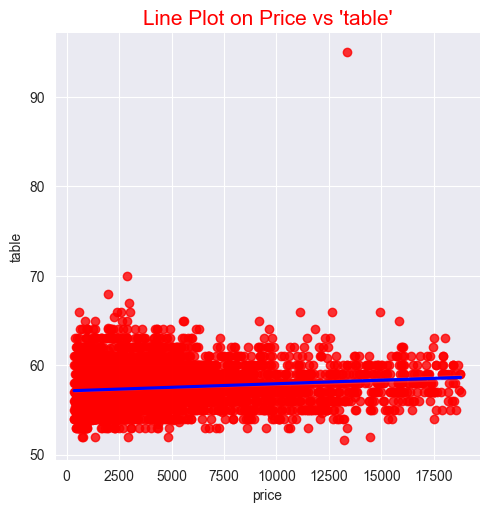

In [10]:
lm = sns.lmplot(x="price", y="table", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Line Plot on Price vs 'table'", color="red", fontsize = 15)
plt.show()

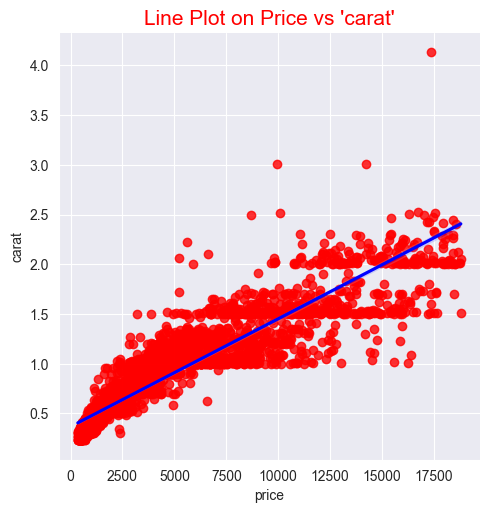

In [11]:
lm = sns.lmplot(x="price", y="carat", data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title("Line Plot on Price vs 'carat'", color="red", fontsize = 15)
plt.show()

Since we have a relatively small dataset and not so many outliers, we can actually look at the instances and evaluate if they are actual outliers, or we can keep them. Also, we don't have many samples, so we try to keep as much as we can.

In [12]:
high_carat = pd.DataFrame(columns=df.columns)
high_table = pd.DataFrame(columns=df.columns)
low_depth = pd.DataFrame(columns=df.columns)
low_z = pd.DataFrame(columns=df.columns)

for index, row in df.iterrows():
    if row["table"] > 90:
        high_table = pd.concat([high_table, pd.DataFrame(row).T], ignore_index=True)
    if row["carat"] > 4:
        high_carat = pd.concat([high_carat, pd.DataFrame(row).T], ignore_index=True)
    if row["depth"] < 45:
        low_depth = pd.concat([low_depth, pd.DataFrame(row).T], ignore_index=True)
    if row["z"] < 2:
        low_z = pd.concat([low_z, pd.DataFrame(row).T], ignore_index=True)

In [13]:
# if we look at the values we see high carat but very bad clarity (I1), below average cut (fair) and decent size. We do not classify it as an outlier. Very bad clarity mitigates the high carat.

high_carat

,carat,cut,color,clarity,depth,table,price,x,y,z
0,4.13,Fair,H,I1,64.8,61.0,17329,10.0,9.85,6.43


In [14]:
# table is the percentage of "table width" compared to its overall size x. It's possible for it to be just a natural anomaly. However, it's very far compared to the norm we observe, so it's probably wise to eliminate it.

high_table

,carat,cut,color,clarity,depth,table,price,x,y,z
0,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


In [15]:
# same with this, we remove it

low_depth

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.0,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12


In [16]:
# we also remove this

low_z

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.41,Ideal,H,VS1,60.7,56.0,9752,7.31,7.22,1.41


In [17]:
for index, row in df.iterrows():
    if row["table"] > 90 or row["depth"] < 45 or row["z"] < 2:
        df.drop(index)

In [18]:
from sklearn.preprocessing import LabelEncoder
import copy

df_proc = copy.deepcopy(df)

le = LabelEncoder()

for col in cat_features:
    df_proc[col] = le.fit_transform(df_proc[col])
    
df_proc

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.10,2,4,3,62.0,55.0,4733,6.61,6.65,4.11
1,1.29,2,4,2,62.6,56.0,6424,6.96,6.93,4.35
2,1.20,3,5,2,61.1,58.0,5510,6.88,6.80,4.18
3,1.50,2,2,2,60.9,56.0,8770,7.43,7.36,4.50
4,0.90,4,2,5,61.7,57.0,4493,6.17,6.21,3.82
...,...,...,...,...,...,...,...,...,...,...
4995,0.38,2,4,7,62.3,53.3,832,4.65,4.69,2.91
4996,0.33,3,3,7,61.3,59.0,927,4.45,4.42,2.72
4997,1.25,2,6,7,62.1,56.0,5980,6.81,6.84,4.24
4998,0.31,3,2,5,62.9,58.0,802,4.31,4.27,2.70


<Axes: >

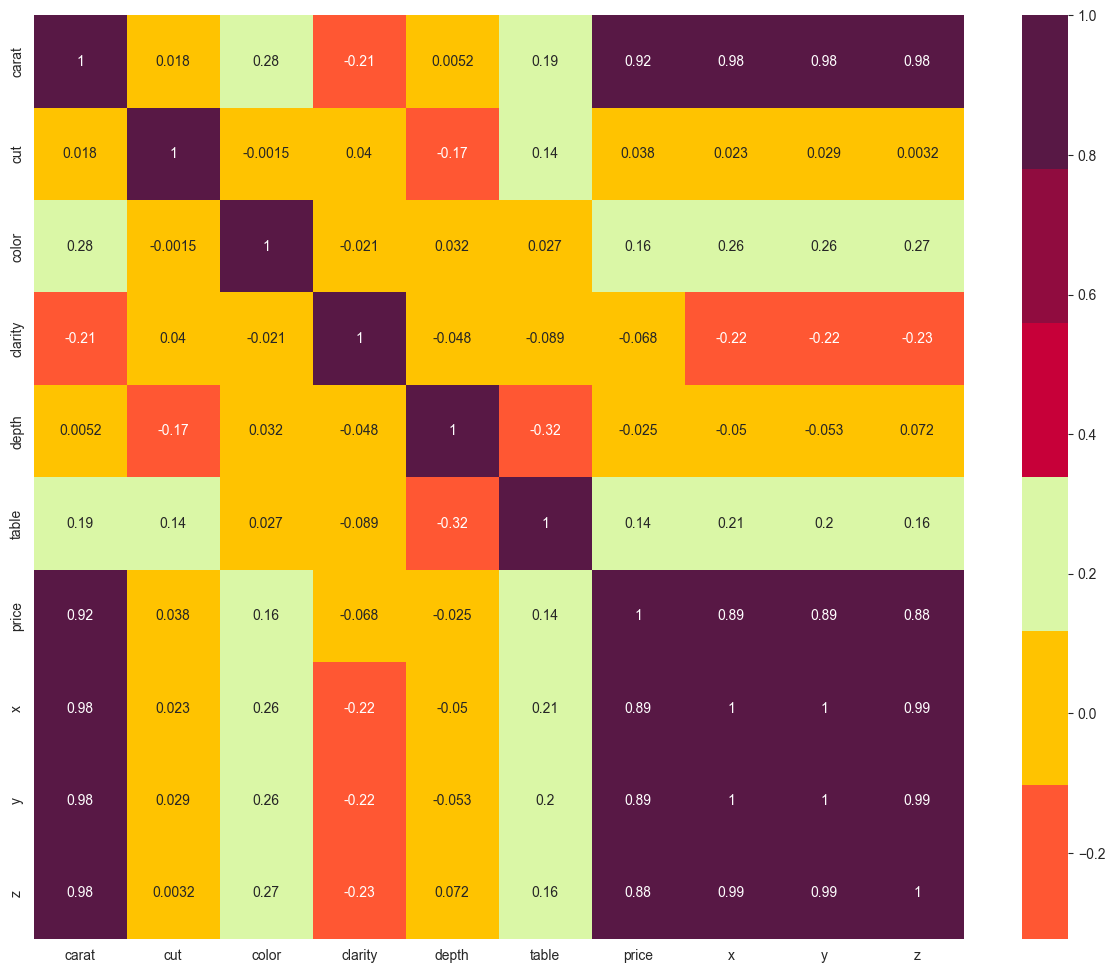

In [19]:
cols = ["#FF5733", "#FFC300", "#DAF7A6", "#C70039", "#900C3F", "#581845"]

corrmat = df_proc.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, cmap=cols, annot=True)

We can see that price (our target variable) is highly correlated with carat, x, y, z. On the other hand, "cut," "color," "clarity," "depth" and "table" aren't as important. We could remove them. But we already have very few features, so we'll see if the model does not work very well we can remove the extra features.

# model building

In [20]:
# start from the unprocessed dataset to build a pipeline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

targets = df["price"]
del df["price"]

x_train, x_test, y_train, y_test = train_test_split(df, targets, test_size=0.20)

In [21]:
# we can try a few pipelines

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor

p1 = Pipeline([
    ("preprocess", ColumnTransformer([
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), cat_features)
    ], remainder="passthrough")),
    ("impute", SimpleImputer(strategy="mean")),
    ("clf", RandomForestRegressor())
])

p2 = Pipeline([
    ("preprocess", ColumnTransformer([
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), cat_features)
    ], remainder="passthrough")),
    ("impute", SimpleImputer(strategy="mean")),
    ("clf", XGBRegressor())
])

p3 = Pipeline([
    ("preprocess", ColumnTransformer([
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), cat_features)
    ], remainder="passthrough")),
    ("impute", SimpleImputer(strategy="mean")),
    ("clf", HistGradientBoostingRegressor())
])

p1.fit(x_train, y_train)
p2.fit(x_train, y_train)
p3.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['carat', 'depth', 'table',
                                                   'x', 'y', 'z']),
                                                 ('cat', OneHotEncoder(),
                                                  ['cut', 'color',
                                                   'clarity'])])),
                ('impute', SimpleImputer()),
                ('clf', HistGradientBoostingRegressor())])

# evaluation

In [22]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    mean_absolute_percentage_error = metrics.mean_absolute_percentage_error(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MAPE: ', round(mean_absolute_percentage_error, 4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    

In [23]:
print("RandomForest")

predicted = p1.predict(x_test)
regression_results(y_test, predicted)

RandomForest
explained_variance:  0.9683
mean_squared_log_error:  0.0178
r2:  0.9683
MAE:  361.932
MAPE:  0.0976
MSE:  514093.2913
RMSE:  717.003


In [24]:
print("XGBoost")

predicted = p2.predict(x_test)
regression_results(y_test, predicted)

XGBoost
explained_variance:  0.9678
mean_squared_log_error:  0.0141
r2:  0.9678
MAE:  345.3015
MAPE:  0.0858
MSE:  521706.3798
RMSE:  722.2924


In [25]:
print("HistGradientBoosting")

predicted = p3.predict(x_test)
regression_results(y_test, predicted)

HistGradientBoosting
explained_variance:  0.9716
mean_squared_log_error:  0.0153
r2:  0.9715
MAE:  335.4866
MAPE:  0.0941
MSE:  460973.0893
RMSE:  678.95


In [26]:
import numpy as np

np.subtract(predicted, y_test)

4186   -123.082959
3187     34.048111
2597     35.604747
4316     78.175353
35     -104.760354
           ...    
208     -35.666194
883     -83.442135
572    -175.251837
4083   -207.195228
4704    347.096145
Name: price, Length: 998, dtype: float64

# let's try with some validation set as well

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df, targets, test_size=0.2, random_state=1)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [28]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_val.shape, y_val.shape

((3591, 9), (3591,), (998, 9), (998,), (400, 9), (400,))

In [29]:
import optuna

def optimize(trial: optuna.Trial) -> float:
    booster = "gbtree"
    eta = trial.suggest_float(name="eta", low=0, high=1)
    gamma = trial.suggest_float(name="gamma", low=0, high=1000)
    max_depth = trial.suggest_int(name="max_depth", low=1, high=50)
    min_child_weight = trial.suggest_float(name="min_child_weight", low=1, high=100)
    lambda_ = trial.suggest_float(name="lambda", low=0, high=100)
    
    params = {
        "booster": booster,
        "eta": eta,
        "gamma": gamma,
        "max_depth": max_depth,
        "min_child_weight": min_child_weight,
        "lambda": lambda_
    }
    
    p2 = Pipeline([
        ("preprocess", ColumnTransformer([
            ("num", StandardScaler(), numeric_features),
            ("cat", OneHotEncoder(), cat_features)
        ], remainder="passthrough")),
        ("impute", SimpleImputer(strategy="mean")),
        ("clf", XGBRegressor(**params))
    ])
    
    p2.fit(x_train, y_train)
    predicted = p2.predict(x_val)
    
    #return metrics.r2_score(y_val, predicted)
    return metrics.mean_absolute_percentage_error(y_val, predicted)

In [30]:
study = optuna.create_study(direction="minimize")
study.optimize(optimize, n_trials=1000, n_jobs=-1)

trials = sorted(study.best_trials, key=lambda t: t.values)

best_trial = trials[0]
best_hps = best_trial.params

best_hps

[I 2024-04-17 15:13:32,253] A new study created in memory with name: no-name-9e02f634-323f-4579-903b-9abb3c0a2104
[I 2024-04-17 15:13:32,950] Trial 9 finished with value: 0.11479567871971075 and parameters: {'eta': 0.990307544416217, 'gamma': 922.617366927628, 'max_depth': 4, 'min_child_weight': 28.931588177146413, 'lambda': 32.549413301123934}. Best is trial 9 with value: 0.11479567871971075.
[I 2024-04-17 15:13:33,066] Trial 15 finished with value: 0.9715021590891385 and parameters: {'eta': 0.0066026274547927866, 'gamma': 264.30493386097265, 'max_depth': 46, 'min_child_weight': 81.05134177964648, 'lambda': 41.102813986471986}. Best is trial 9 with value: 0.11479567871971075.
[I 2024-04-17 15:13:33,127] Trial 13 finished with value: 0.120293831766935 and parameters: {'eta': 0.9976039015026331, 'gamma': 965.6794430096894, 'max_depth': 6, 'min_child_weight': 38.62962214833626, 'lambda': 7.164937947661986}. Best is trial 9 with value: 0.11479567871971075.
[I 2024-04-17 15:13:33,271] Tria

{'eta': 0.23645785479730405,
 'gamma': 161.47022026948284,
 'max_depth': 35,
 'min_child_weight': 5.649873473511894,
 'lambda': 95.28968797660222}

In [31]:
print("XGBoost")

predicted = p2.predict(x_test)
regression_results(y_test, predicted)

XGBoost
explained_variance:  0.9922
mean_squared_log_error:  0.0054
r2:  0.9922
MAE:  161.6456
MAPE:  0.0518
MSE:  128096.2044
RMSE:  357.9053


# export the model

In [32]:
import pickle

with open("pipeline.pkl", "wb") as model:
    pickle.dump(p2, model)